In [21]:
# 📊 Amazon Product Review Sentiment Analysis
# This project analyzes product reviews from Amazon to understand

In [1]:
# 1️⃣ Import Libraries
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# 2️⃣ Load Dataset
from google.colab import files
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving amazon_dataset.zip to amazon_dataset.zip


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
# 3️⃣ Clean Review Text
def clean_text(text):
    text = str(text).lower()                        # lowercase
    text = re.sub(r'http\S+', '', text)             # remove links
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)     # remove special characters
    text = text.strip()                             # remove leading/trailing spaces
    return text

df['clean_review'] = df['review_content'].apply(clean_text)

In [4]:
# remove null values
df.dropna(subset=['review_content', 'discounted_price', 'actual_price'], inplace=True)

In [5]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [6]:
# 4️⃣ Sentiment Analysis
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
# 5️⃣ Add Sentiment Labels
def sentiment_label(score):
    if score > 0.2:
        return 'Positive'
    elif score < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(sentiment_label)


In [8]:
# Clean price columns
def clean_price(price):
    if pd.isnull(price):
        return 0
    price = str(price).replace('₹','').replace(',','').strip()
    try:
        return float(price)
    except:
        return 0

df['discounted_price'] = df['discounted_price'].apply(clean_price)
df['actual_price'] = df['actual_price'].apply(clean_price)

# Example: check summary
df[['discounted_price','actual_price']].head()

,discounted_price,actual_price
0,399.0,1099.0
1,199.0,349.0
2,199.0,1899.0
3,329.0,699.0
4,154.0,399.0


from matplotlib import pyplot as plt
_df_0['discounted_price'].plot(kind='hist', bins=20, title='discounted_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['actual_price'].plot(kind='hist', bins=20, title='actual_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='discounted_price', y='actual_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['discounted_price'].plot(kind='line', figsize=(8, 4), title='discounted_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['actual_price'].plot(kind='line', figsize=(8, 4), title='actual_price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# Clean rating column
def clean_numeric(x):
    try:
        return float(str(x).replace(',','').strip())
    except:
        return 0  # or np.nan if you prefer

df['rating'] = df['rating'].apply(clean_numeric)

print(df['rating'].unique())  # should show only numbers
print(df['discounted_price'].unique())  # check price column


[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 0.  2.  2.6 2.9]
[3.99000e+02 1.99000e+02 3.29000e+02 1.54000e+02 1.49000e+02 1.76630e+02
 2.29000e+02 4.99000e+02 2.99000e+02 2.19000e+02 3.50000e+02 1.59000e+02
 3.49000e+02 1.39990e+04 2.49000e+02 1.34900e+04 9.70000e+02 2.79000e+02
 5.90000e+01 1.14990e+04 1.49990e+04 1.79000e+02 3.89000e+02 5.99000e+02
 9.90000e+01 8.99000e+02 3.29990e+04 2.09000e+02 1.99990e+04 9.99000e+02
 3.33000e+02 5.07000e+02 3.09000e+02 1.19900e+03 7.99000e+02 6.99900e+03
 2.30000e+02 6.49000e+02 1.59990e+04 3.48000e+02 3.29900e+04 1.39000e+02
 2.63000e+02 7.99900e+03 1.59900e+03 2.69990e+04 1.15000e+02 1.09010e+04
 1.43400e+03 7.29900e+03 3.25000e+02 2.99990e+04 2.79990e+04 3.09900e+04
 2.69000e+02 2.49990e+04 1.89900e+04 2.90000e+02 3.45000e+02 1.09900e+03
 7.19000e+02 8.49000e+02 2.19990e+04 4.49000e+02 3.79990e+04 7.39000e+03
 2.73100e+02 1.59900e+04 2.10000e+02 1.29900e+03 3.47000e+02 2.28000e+02
 1.49900e+03 8.499

In [22]:
# 6️⃣ Summary Statistics by Category
summary = df.groupby('category').agg({
    'sentiment_score':'mean',
    'discounted_price':'mean',
    'rating':'mean',
    'review_id':'count'
}).reset_index()

summary.rename(columns={'review_id':'total_reviews'}, inplace=True)
print(summary)

                                              category  sentiment_score  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...         0.258214   
1    Computers&Accessories|Accessories&Peripherals|...         0.309141   
2    Computers&Accessories|Accessories&Peripherals|...         0.168750   
3    Computers&Accessories|Accessories&Peripherals|...         0.395322   
4    Computers&Accessories|Accessories&Peripherals|...         0.387340   
..                                                 ...              ...   
206  OfficeProducts|OfficePaperProducts|Paper|Stati...         0.456786   
207  OfficeProducts|OfficePaperProducts|Paper|Stati...         0.355069   
208  OfficeProducts|OfficePaperProducts|Paper|Stati...         0.405972   
209  OfficeProducts|OfficePaperProducts|Paper|Stati...         0.154518   
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...         0.371966   

     discounted_price    rating  total_reviews  
0         2339.000000  3.800000              1  
1

In [23]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,sentiment_score
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.093788,0.269763
std,6944.304394,10874.826864,21.635905,0.310598,0.137310
min,39.000000,39.000000,0.000000,0.000000,-0.600000
25%,325.000000,800.000000,32.000000,4.000000,0.177652
50%,799.000000,1650.000000,50.000000,4.100000,0.257459
75%,1999.000000,4295.000000,63.000000,4.300000,0.353431
max,77990.000000,139900.000000,94.000000,5.000000,1.000000


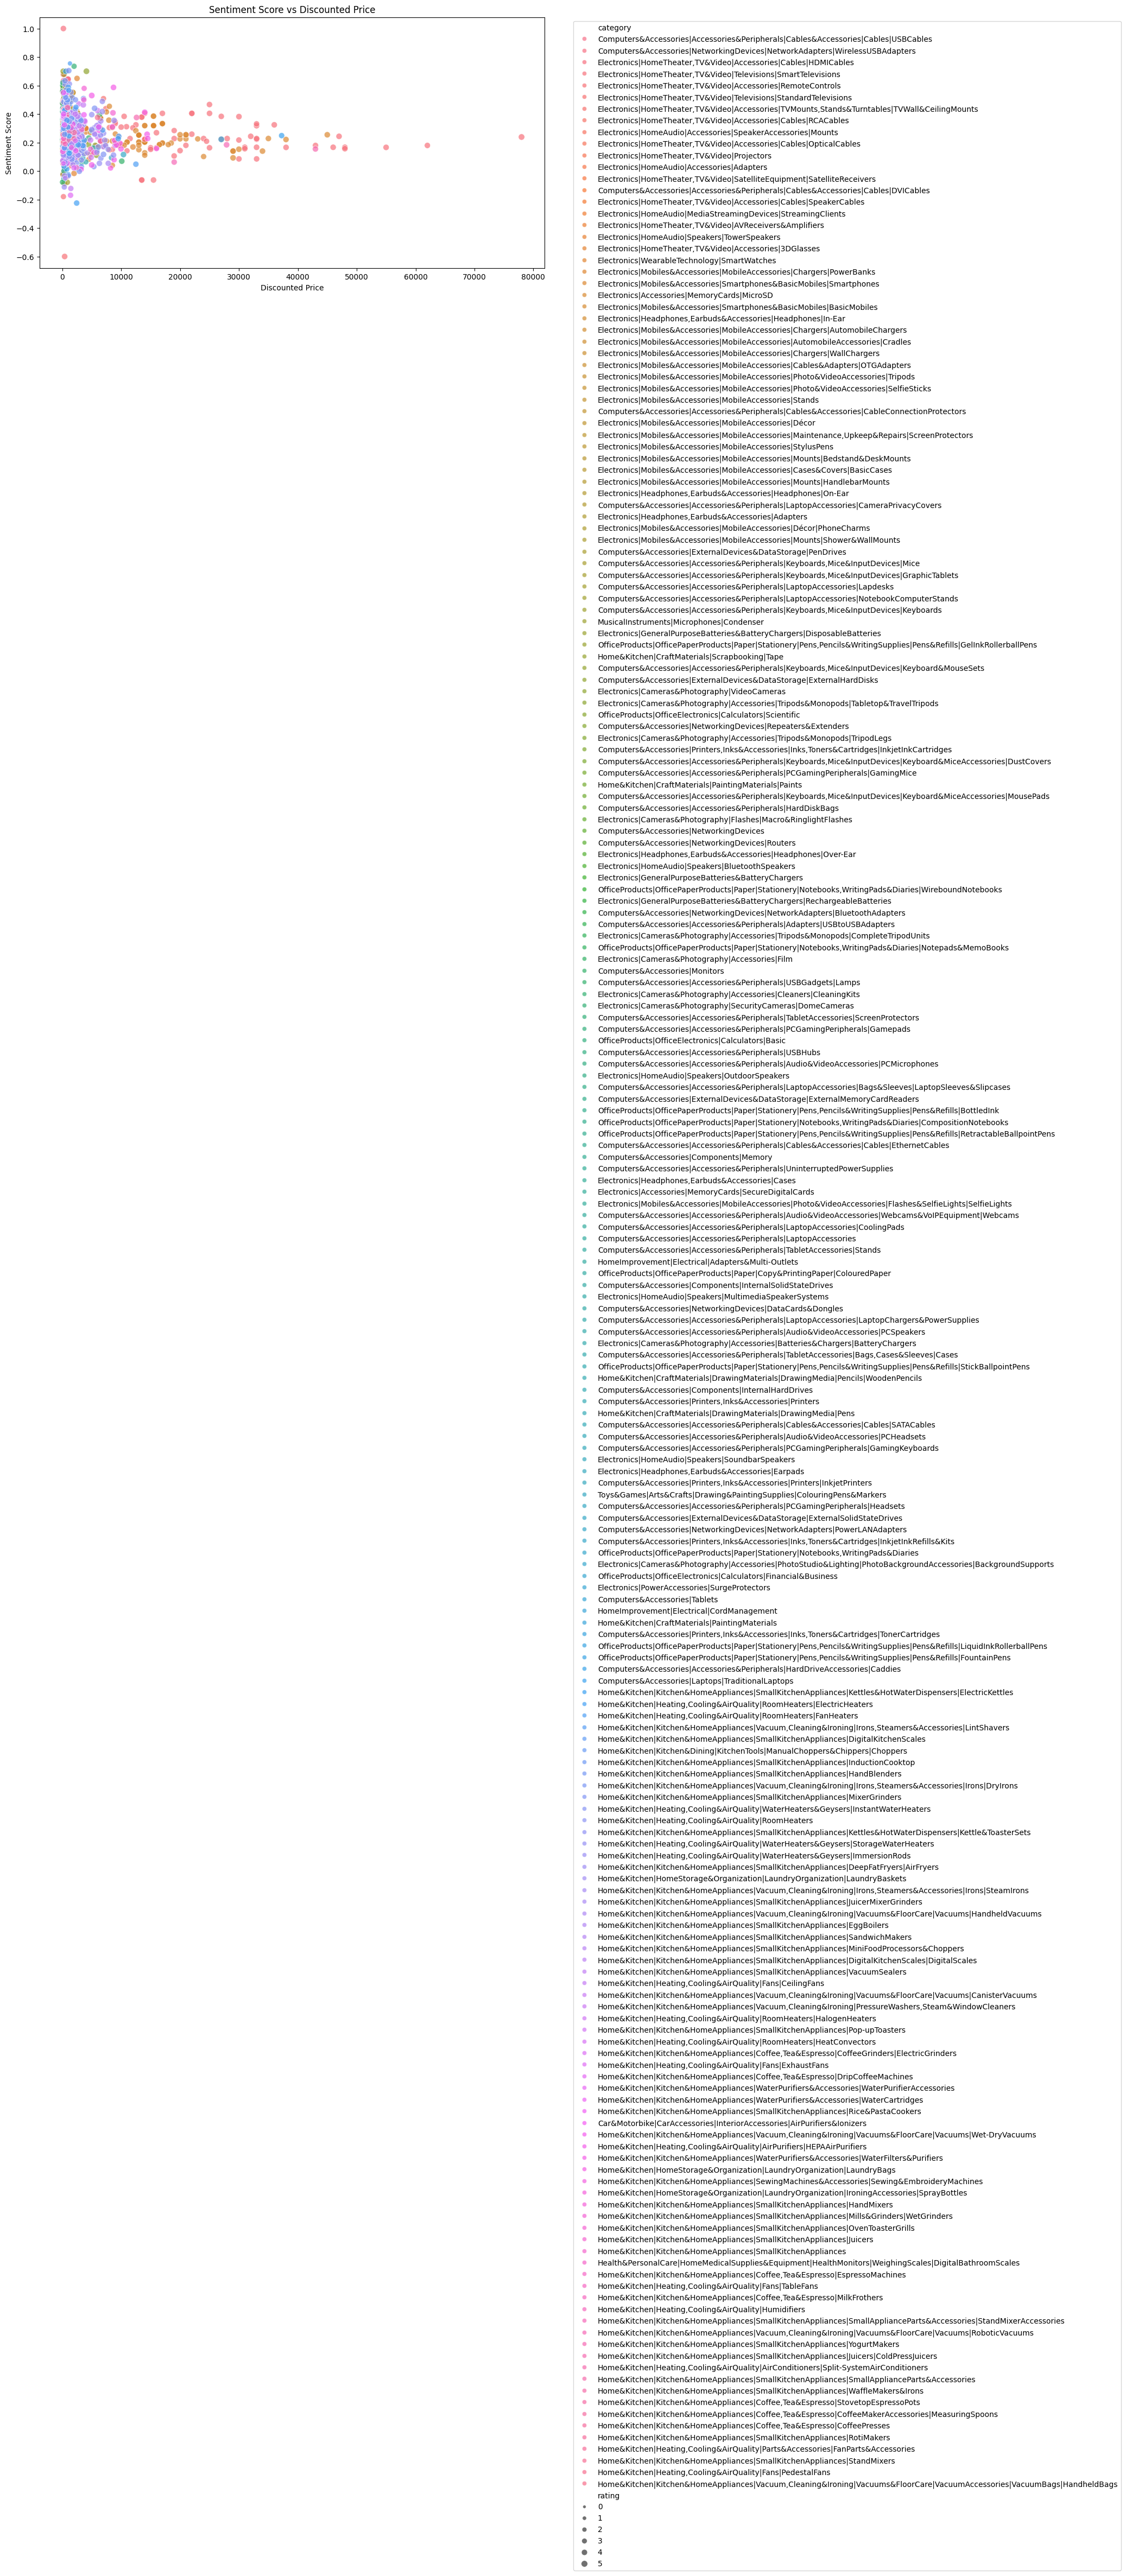

In [11]:
# 7️⃣ Visualizations

# Scatter Plot: Sentiment vs Price
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='discounted_price', y='sentiment_score', size='rating', hue='category', alpha=0.7)
plt.title("Sentiment Score vs Discounted Price")
plt.xlabel("Discounted Price")
plt.ylabel("Sentiment Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

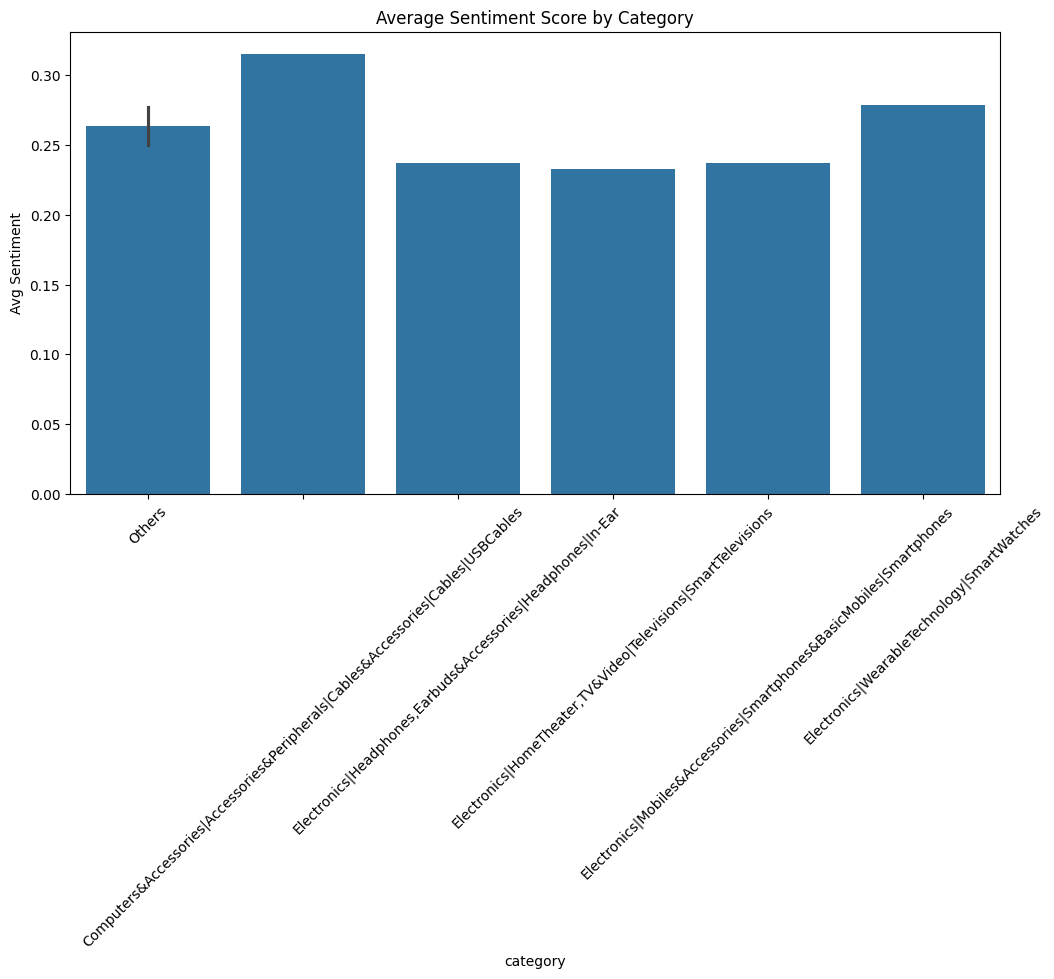

In [12]:
# Bar Plot: Average Sentiment by Category
#  categories with <50 reviews grouped as Others
summary['category'] = summary.apply(lambda x: x['category'] if x['total_reviews']>=50 else 'Others', axis=1)

plt.figure(figsize=(12,6))
sns.barplot(data=summary, x='category', y='sentiment_score')
plt.xticks(rotation=45)
plt.title("Average Sentiment Score by Category")
plt.ylabel("Avg Sentiment")
plt.show()

In [14]:
summary['category'].value_counts()

,count
category,
Others,206
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",1
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",1
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,1
Electronics|WearableTechnology|SmartWatches,1


In [16]:
# Clean discount percentage column
def clean_discount(x):
    try:
        return float(str(x).replace('%', '').strip())
    except:
        return np.nan

if 'discount_percentage' in df.columns:
    df['discount_percentage'] = df['discount_percentage'].apply(clean_discount)


In [17]:
summary = df.groupby('category', as_index=False).agg({
    'sentiment_score': 'mean',
    'rating': 'mean',
    'discount_percentage': 'mean'
})


/tmp/ipython-input-3264389078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_summary, y='category', x='sentiment_score', palette="viridis")


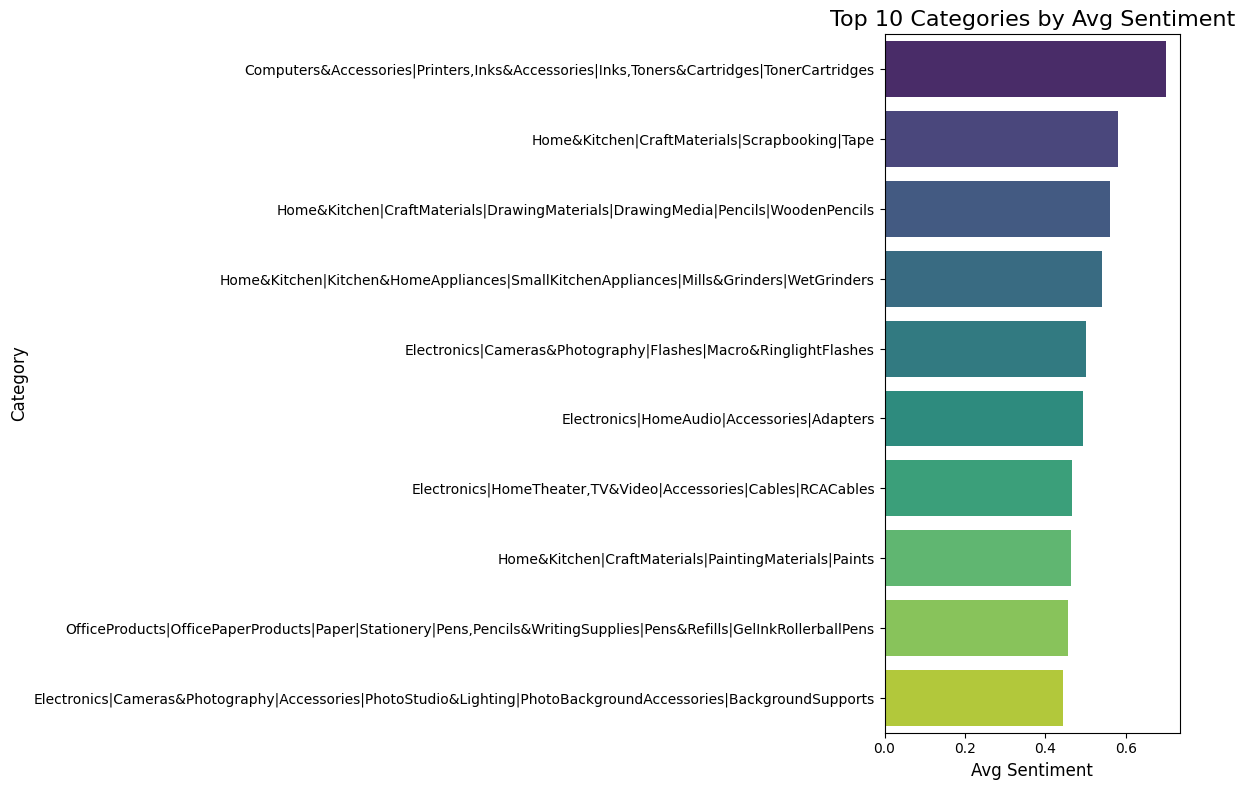

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

top_summary = summary.sort_values(by='sentiment_score', ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(data=top_summary, y='category', x='sentiment_score', palette="viridis")
plt.title("Top 10 Categories by Avg Sentiment", fontsize=16)
plt.xlabel("Avg Sentiment", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()


In [19]:
# Final Summary Table – Top Categories
final_summary = summary.sort_values(by='sentiment_score', ascending=False).head(10)[
    ['category', 'sentiment_score', 'rating', 'discount_percentage']
]

print("🔹 Top 10 Performing Categories by Sentiment Score:\n")
display(final_summary.style.background_gradient(cmap='viridis'))


🔹 Top 10 Performing Categories by Sentiment Score:



,category,sentiment_score,rating,discount_percentage
54,"Computers&Accessories|Printers,Inks&Accessories|Inks,Toners&Cartridges|TonerCartridges",0.700000,4.100000,48.000000
125,Home&Kitchen|CraftMaterials|Scrapbooking|Tape,0.582000,3.900000,21.000000
121,Home&Kitchen|CraftMaterials|DrawingMaterials|DrawingMedia|Pencils|WoodenPencils,0.560000,4.300000,0.000000
167,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Mills&Grinders|WetGrinders,0.539792,3.800000,21.500000
67,Electronics|Cameras&Photography|Flashes|Macro&RinglightFlashes,0.501282,3.800000,60.000000
79,Electronics|HomeAudio|Accessories|Adapters,0.492857,4.400000,65.000000
91,"Electronics|HomeTheater,TV&Video|Accessories|Cables|RCACables",0.467238,4.300000,50.500000
124,Home&Kitchen|CraftMaterials|PaintingMaterials|Paints,0.464729,4.433333,9.333333
206,"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.456786,4.250000,0.000000
63,Electronics|Cameras&Photography|Accessories|PhotoStudio&Lighting|PhotoBackgroundAccessories|BackgroundSupports,0.443333,4.300000,46.000000


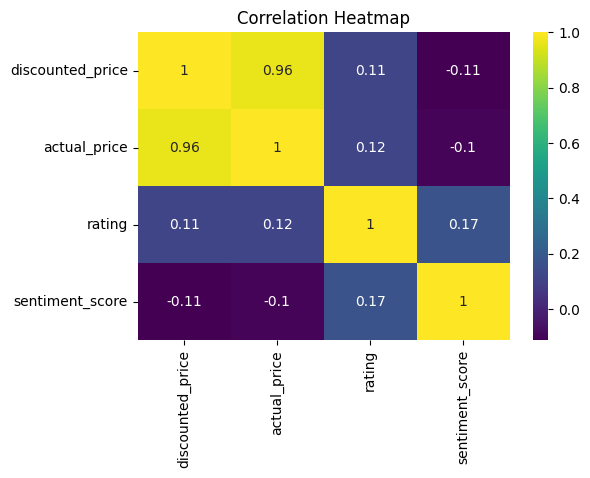

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['discounted_price','actual_price','rating','sentiment_score']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Export the cleaned dataset
df.to_csv("cleaned_amazon_reviews.csv", index=False)
files.download("cleaned_amazon_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>